In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor,GammaRegressor,Lasso,ElasticNet,Ridge
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import precision_recall_curve, precision_score, recall_score,roc_curve,auc,log_loss,confusion_matrix,accuracy_score,mean_squared_error,root_mean_squared_error
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')


Metal testing is a process or procedure used to check composition of an unknown metallic substance. There are destructive processes and nondestructive processes. Metal testing can also include, determining the properties of newly forged metal alloys. With many chemical-property databases readily available, identification of unmarked pure, common metals can be a quick and easy process. Leaving the original sample in complete, re-usable condition. This type of testing is nondestructive. When working with alloys (forged mixtures) of metals however, to determine the exact composition, could result in the original sample being separated into its starting materials, then measured and calculated. After the components are known they can be looked up and matched to known alloys. The original sample would be destroyed in the process. This type of testing is destructive.

**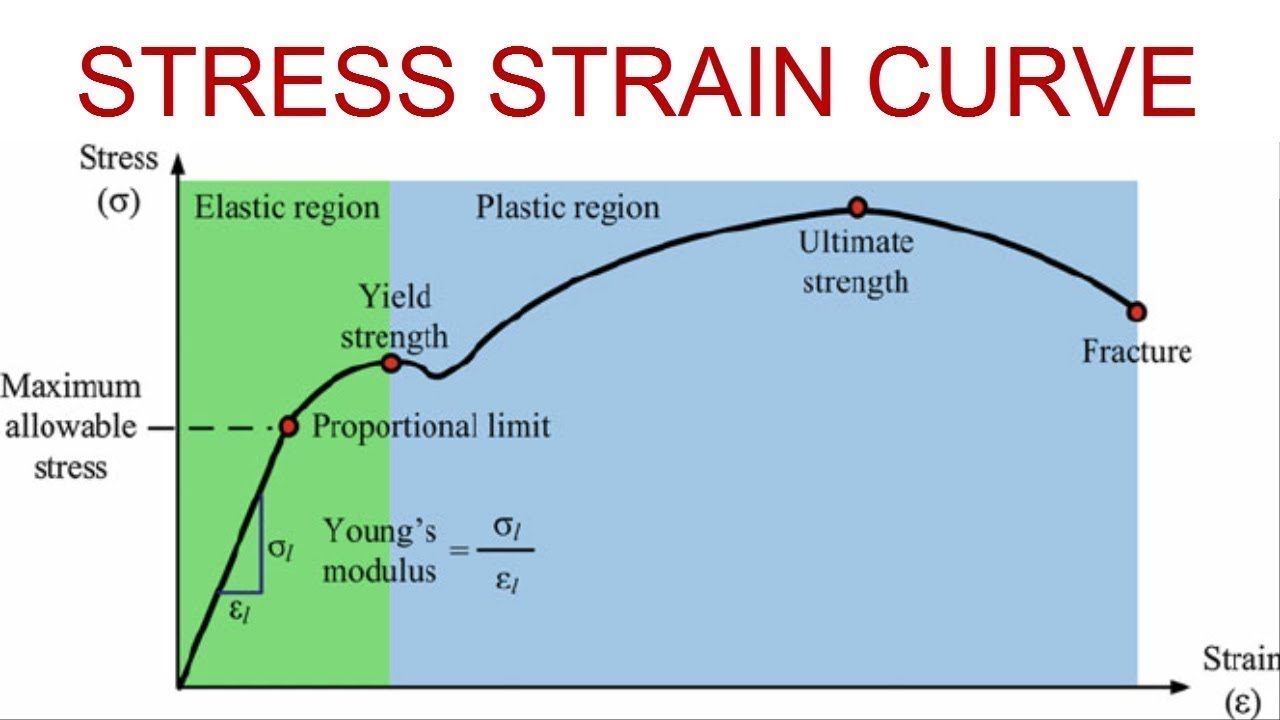**

In [224]:
df=pd.read_csv(r'steel_strength.csv')
df

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0...,0.38,0.18,0.01,7.27,0.01,3.77,0.96,0.00,0.01,4.90,0.00,0.03,0.00,1722.5,1998.1,5.0
308,Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0....,0.00,0.06,0.05,5.15,10.20,3.20,0.01,0.00,0.01,0.01,0.00,0.03,0.09,1019.0,1019.0,19.0
309,Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0...,0.37,0.17,0.01,5.20,0.01,5.84,1.05,0.00,0.91,4.88,0.00,0.03,0.00,1860.3,2156.6,3.0
310,Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.0...,0.41,0.19,0.01,6.99,0.01,5.84,0.92,0.00,0.01,0.02,0.00,0.03,0.00,1812.1,2087.7,2.0


In [225]:
df.columns

Index(['formula', 'c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w',
       'al', 'ti', 'yield strength', 'tensile strength', 'elongation'],
      dtype='object')

In [226]:
df.drop(columns=['formula','tensile strength', 'elongation'],inplace=True)

In [227]:
df.isnull().sum()

c                 0
mn                0
si                0
cr                0
ni                0
mo                0
v                 0
n                 0
nb                0
co                0
w                 0
al                0
ti                0
yield strength    0
dtype: int64

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   c               312 non-null    float64
 1   mn              312 non-null    float64
 2   si              312 non-null    float64
 3   cr              312 non-null    float64
 4   ni              312 non-null    float64
 5   mo              312 non-null    float64
 6   v               312 non-null    float64
 7   n               312 non-null    float64
 8   nb              312 non-null    float64
 9   co              312 non-null    float64
 10  w               312 non-null    float64
 11  al              312 non-null    float64
 12  ti              312 non-null    float64
 13  yield strength  312 non-null    float64
dtypes: float64(14)
memory usage: 34.2 KB


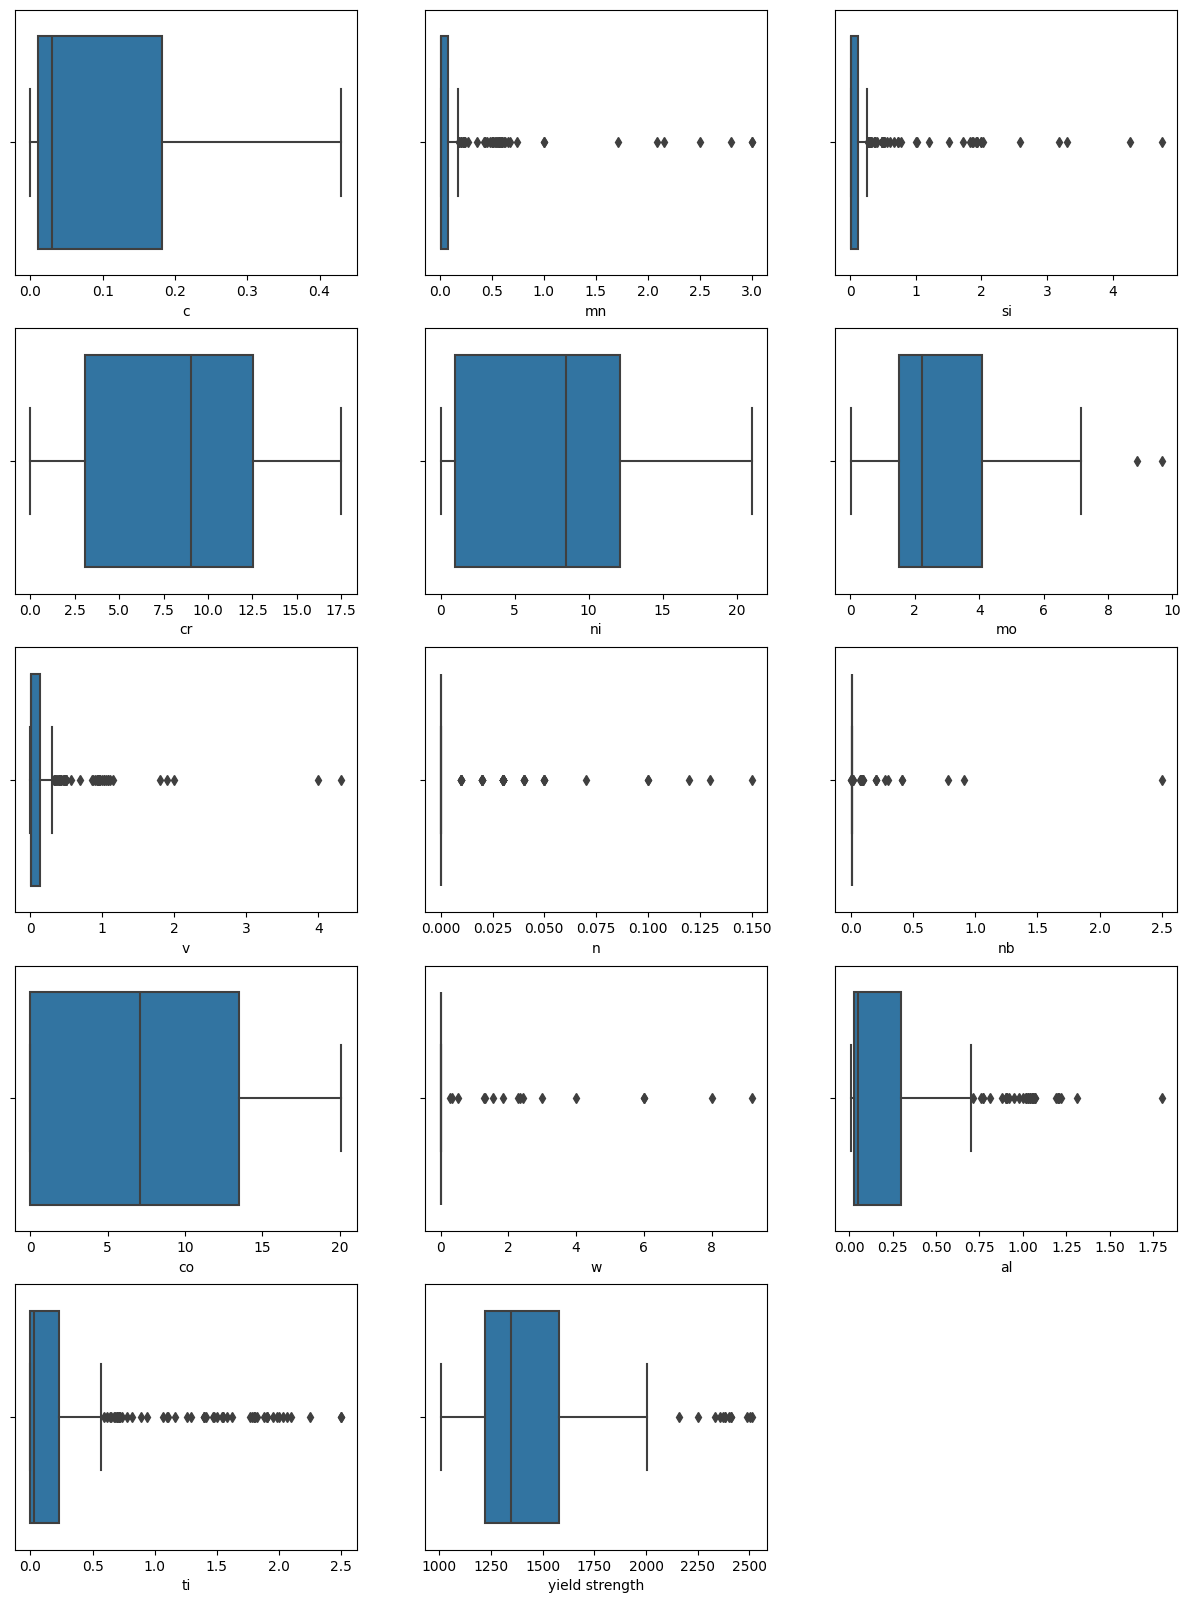

In [229]:
i=1
plt.figure(figsize=(15,20))
for j in df.columns:
    plt.subplot(5,3,i)
    sns.boxplot(data=df,x=df[j])
    i+=1
plt.show()

In [231]:
def outlier_tret(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    upper=x.quantile(0.99)                                    #  x.quantile(0.96),  q3+1.5*iqr 
    lower=x.quantile(0.01)                                     #  x.quantile(0.4)    q1-1.5*iqr 
    x=np.where(x>upper,upper,x)
    x=np.where(x<lower,lower,x)
    return x

In [232]:
df=df.apply(lambda x: outlier_tret(x))

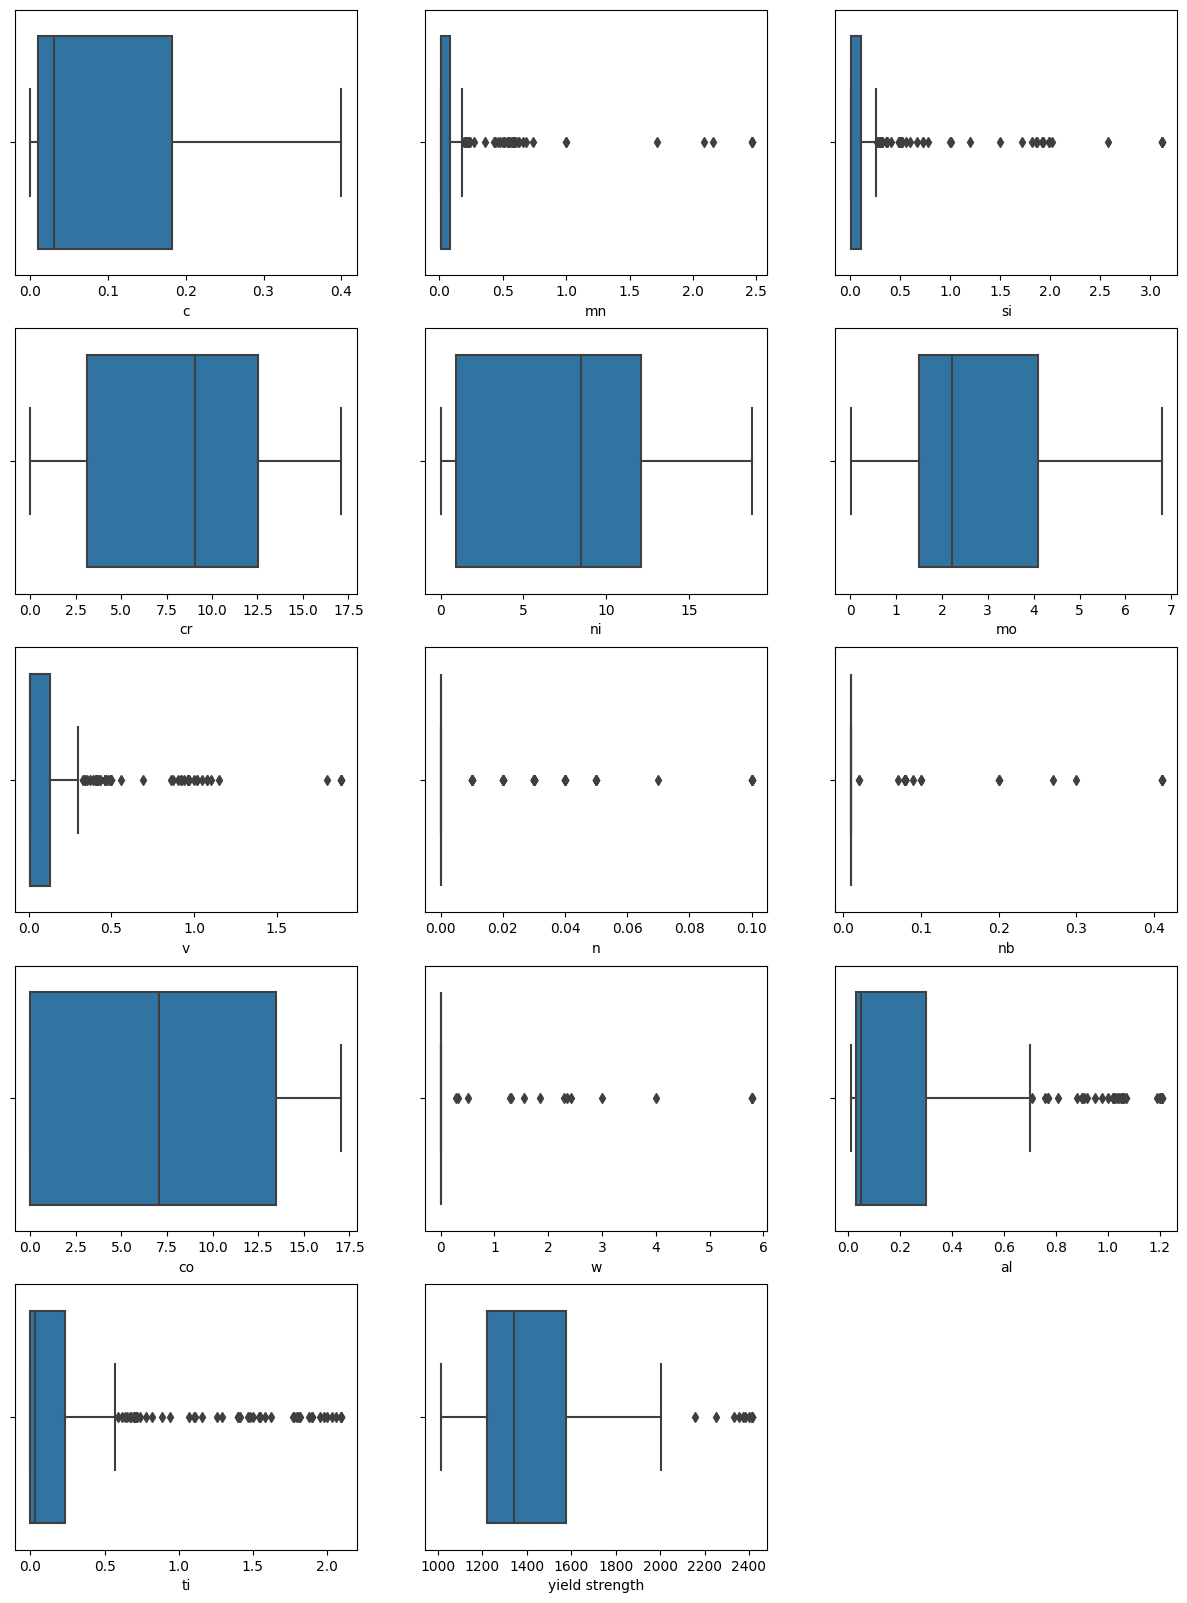

In [233]:
i=1
plt.figure(figsize=(15,20))
for j in df.columns:
    plt.subplot(5,3,i)
    sns.boxplot(data=df,x=df[j])
    i+=1
plt.show()

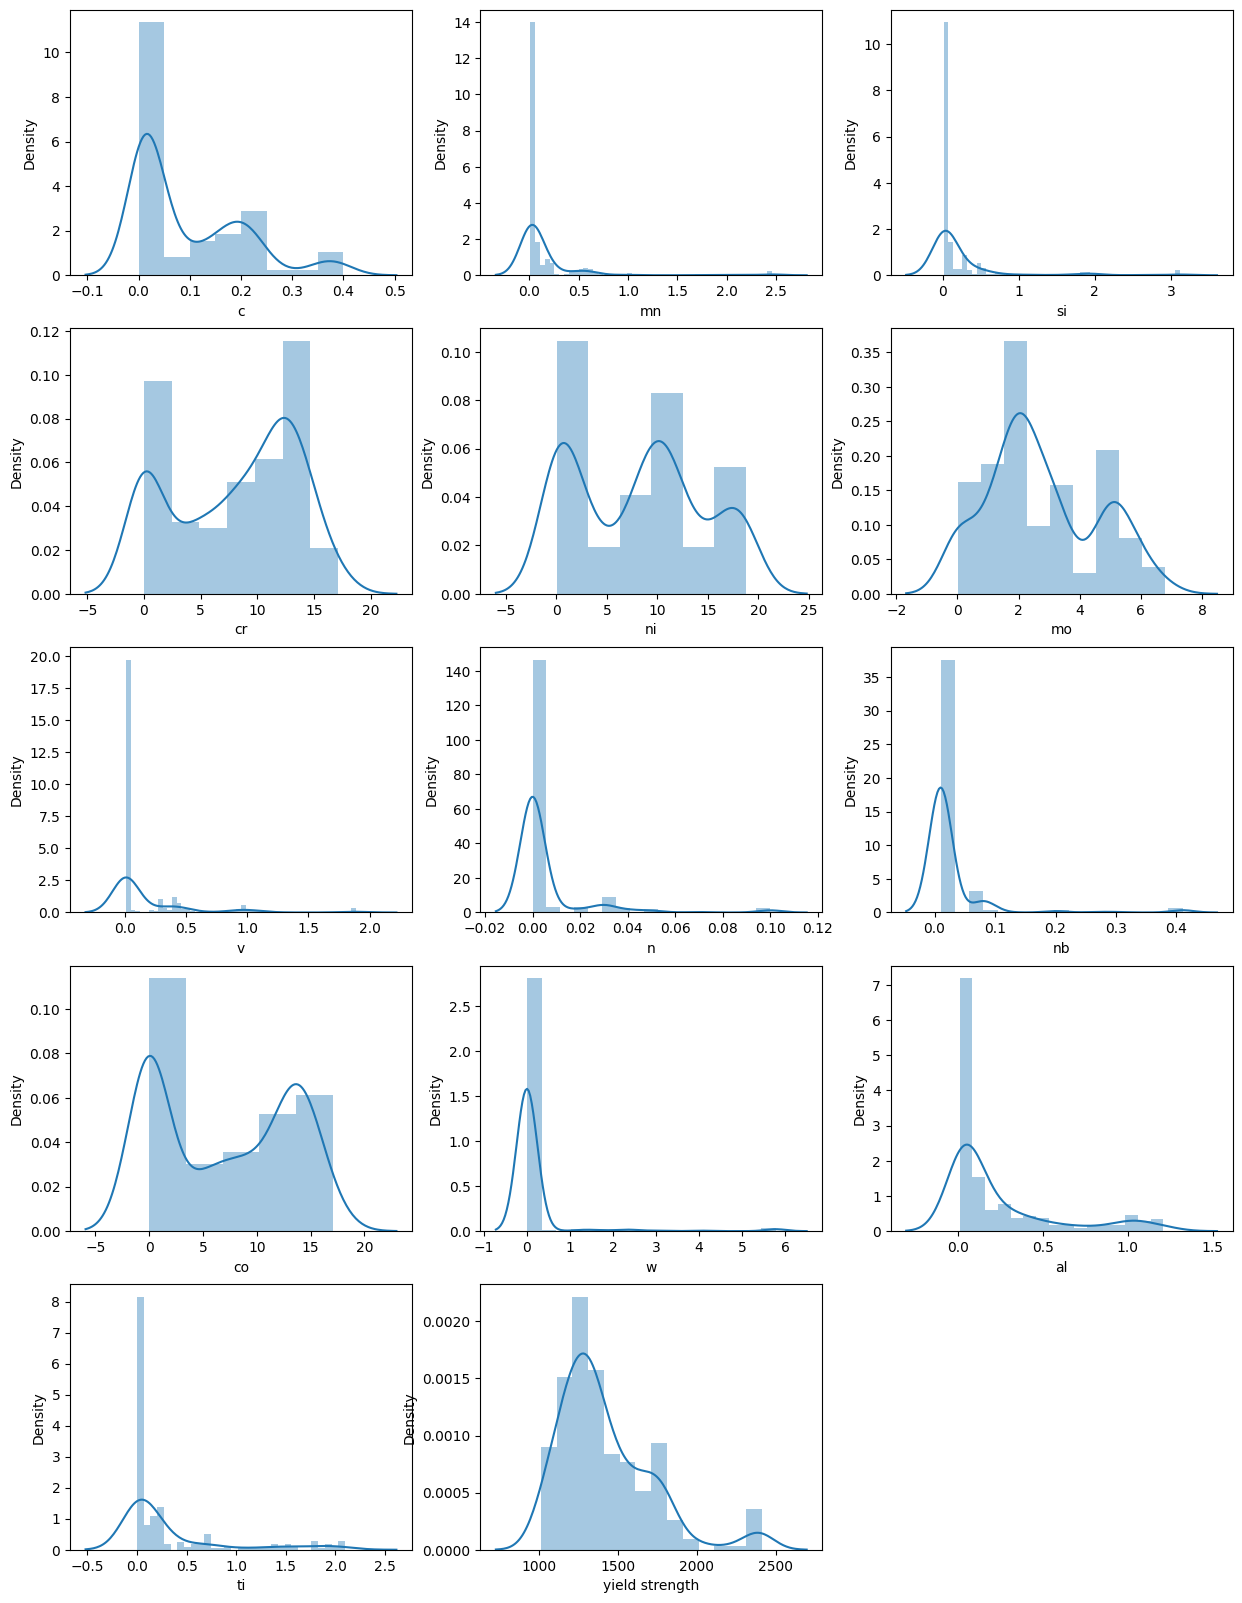

In [234]:

# df.hist(figsize=(20,20))
# plt.show()
i=1
plt.figure(figsize=(15,20))
for j in df.columns:
    plt.subplot(5,3,i)
    sns.distplot(df[j])
    i+=1
plt.show()

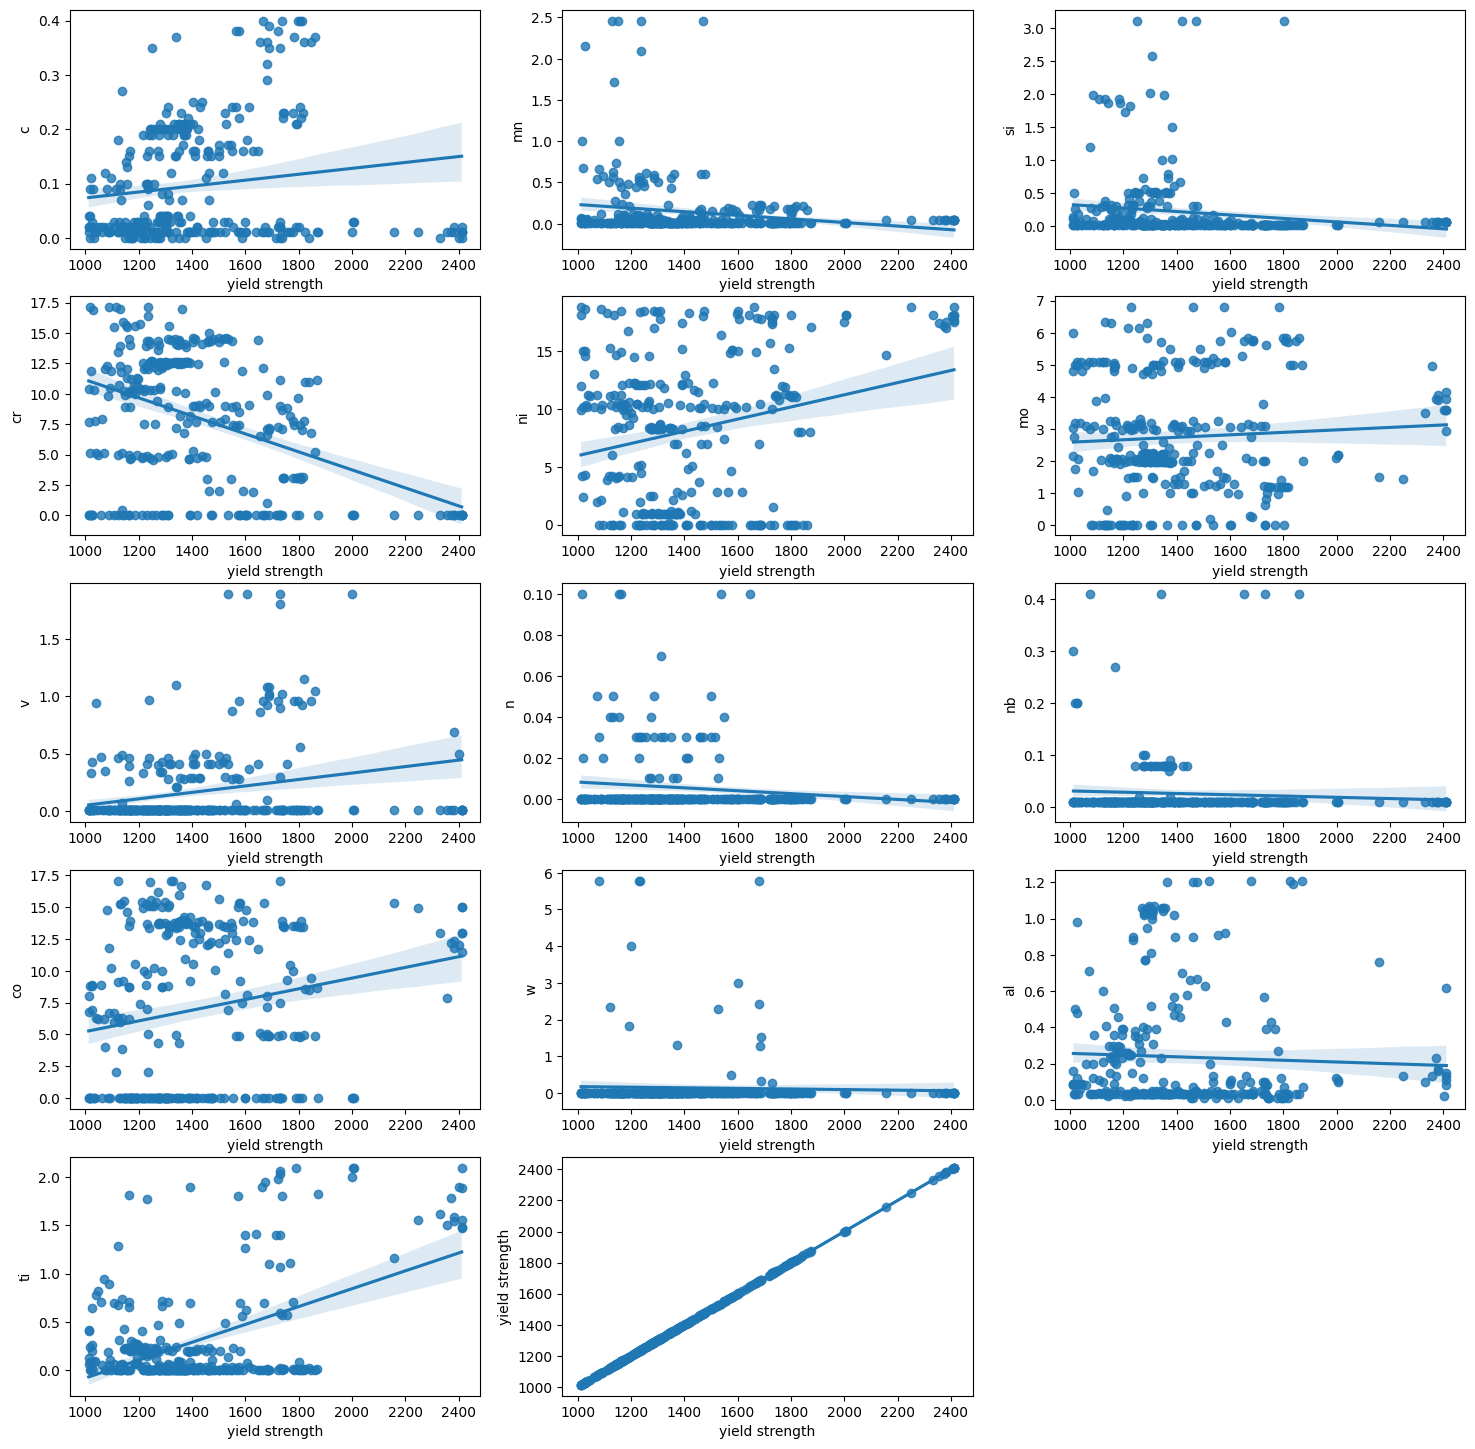

In [235]:
i=1
plt.figure(figsize = (18,18))
for col in df.columns:
    plt.subplot(5,3,i)
    sns.regplot(data=df,x='yield strength',y=col)
    i+=1

In [236]:
df.corr()

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength
c,1.000000,0.024311,-0.011079,0.230666,-0.656029,0.140112,0.415419,0.083062,0.230417,0.425676,0.058597,-0.417905,-0.423489,0.149826
mn,0.024311,1.000000,0.030177,0.209840,-0.130474,-0.132264,-0.063559,0.133752,-0.030238,-0.177215,0.059233,-0.022694,-0.168496,-0.178099
si,-0.011079,0.030177,1.000000,0.069771,-0.016475,-0.347206,-0.140496,-0.026404,0.028083,-0.017528,-0.034243,-0.182743,-0.181934,-0.151810
cr,0.230666,0.209840,0.069771,1.000000,-0.811214,-0.024485,-0.097834,0.348878,-0.000765,0.122194,0.050687,0.087042,-0.617515,-0.408488
ni,-0.656029,-0.130474,-0.016475,-0.811214,1.000000,-0.188148,-0.162476,-0.371044,-0.146000,-0.411337,-0.115678,0.225929,0.661602,0.248911
mo,0.140112,-0.132264,-0.347206,-0.024485,-0.188148,1.000000,0.229608,0.307572,0.104724,0.146371,-0.211337,0.021255,0.019615,0.064490
v,0.415419,-0.063559,-0.140496,-0.097834,-0.162476,0.229608,1.000000,0.100959,0.211973,0.042842,0.033008,-0.219297,0.031120,0.242422
n,0.083062,0.133752,-0.026404,0.348878,-0.371044,0.307572,0.100959,1.000000,-0.020281,0.196114,0.060835,-0.164025,-0.179971,-0.130272
nb,0.230417,-0.030238,0.028083,-0.000765,-0.146000,0.104724,0.211973,-0.020281,1.000000,0.085410,-0.050291,-0.102590,-0.084609,-0.061163
co,0.425676,-0.177215,-0.017528,0.122194,-0.411337,0.146371,0.042842,0.196114,0.085410,1.000000,0.009423,-0.425441,-0.133305,0.201851


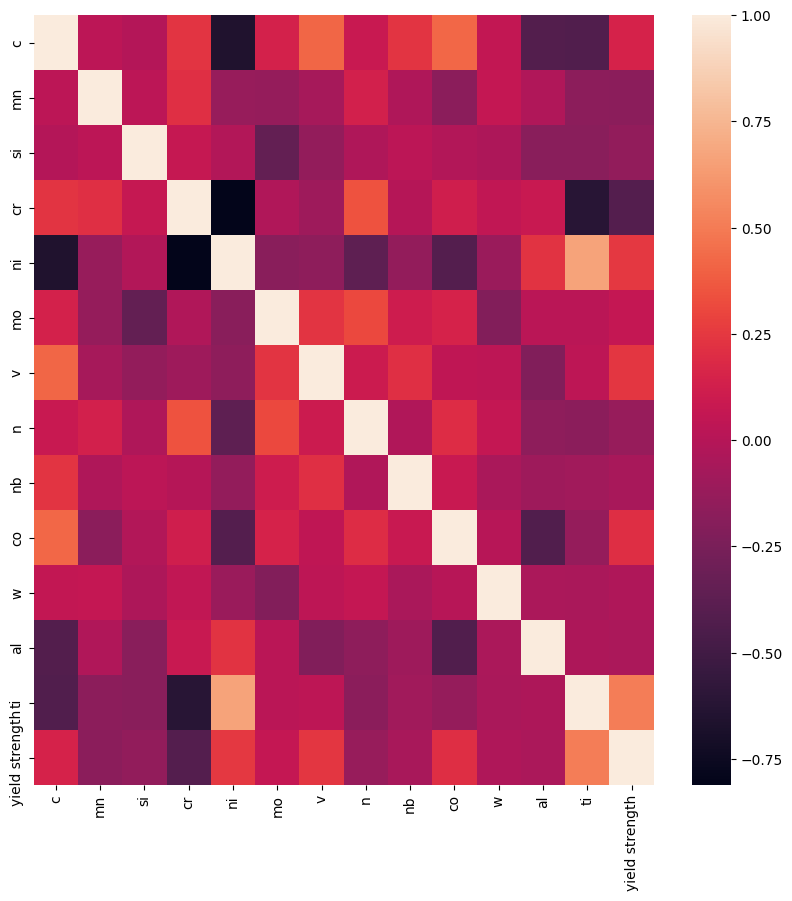

In [237]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()


In [238]:
df_corr=df.corr()

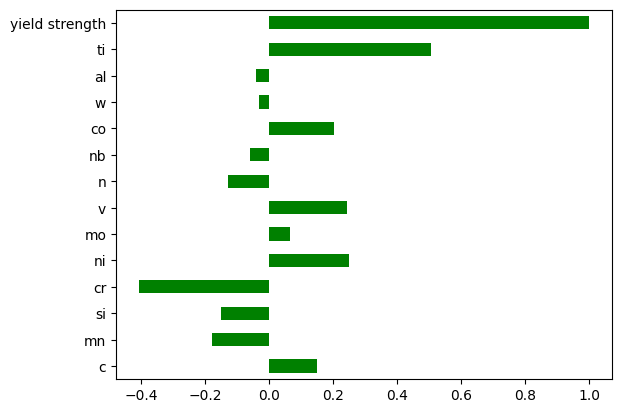

In [239]:
df_corr['yield strength'].plot(kind='barh',color='green')
plt.show()

In [240]:
Y=df['yield strength']
X=df.drop(columns='yield strength')

In [241]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [242]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [243]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=.30,random_state=0)

In [244]:
lr=LinearRegression()
sgd=SGDRegressor()
lasso=Lasso()
ridge=Ridge()
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()
gboost=GradientBoostingRegressor()
bagging=BaggingRegressor()
adboost=AdaBoostRegressor()
knn=KNeighborsRegressor()
etr=ExtraTreesRegressor()
gamma=GammaRegressor()
Xgbr=XGBRegressor()

In [245]:
algo=[lr,sgd,lasso,ridge,rf,dt,gboost,bagging,adboost,knn,etr,Xgbr]

In [246]:
model=[]
accuracy_test=[]
accuracy_train=[]
cross_val=[]
rsme_cal=[]
for i in range(len(algo)):
    algo[i].fit(x_train,y_train)
    y_test_pred = algo[i].predict(x_test)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)
    rsme_cal.append(test_rmse)
    accuracy_train.append(algo[i].score(x_train,y_train))  # R² score for training data
    accuracy_test.append(algo[i].score(x_test,y_test))     # R² score for testing data
    model.append(algo[i])
    # Define a KFold cross-validator
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    # Perform cross-validation and calculate the mean squared error (MSE) for each fold
    scores = cross_val_score(algo[i], X_scaled, Y, cv=kf, scoring='neg_mean_squared_error')
    # Calculate the mean and standard deviation of the MSE scores
    rsme = np.sqrt(-scores.mean())
    cross_val.append(rsme)
    

In [247]:
mod=pd.DataFrame([model,accuracy_train,accuracy_test,cross_val,rsme_cal]).T
mod.columns=['model','score_train','score_test','rsme_cross_val_score','root_mean_squared_error']
mod

,model,score_train,score_test,rsme_cross_val_score,root_mean_squared_error
0,LinearRegression(),0.54496,0.481842,213.22623,202.249996
1,SGDRegressor(),0.543212,0.484201,212.369708,201.789048
2,Lasso(),0.544311,0.481644,212.65195,202.288616
3,Ridge(),0.544847,0.481955,212.918084,202.227911
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.97477,0.809226,124.737822,122.720617
5,DecisionTreeRegressor(),1.0,0.626733,148.284744,171.659156
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.968764,0.790482,128.182592,128.607944
7,(DecisionTreeRegressor(random_state=285075353)...,0.954898,0.80854,127.303077,122.940777
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.854579,0.723179,150.567242,147.828062
9,KNeighborsRegressor(),0.747422,0.672551,165.907812,160.779067


In [258]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [259]:
# Initialize the ExtraTreesRegressor
model = ExtraTreesRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

In [260]:
# Fit the model
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [261]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
# Train the model with the best parameters
best_model = grid_search.best_estimator_

Best hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [262]:
# Evaluate the tuned model
train_score = best_model.score(x_train, y_train)
test_score = best_model.score(x_test, y_test)

print(f'Training Score: {train_score:.4f}')
print(f'Testing Score: {test_score:.4f}')

Training Score: 1.0000
Testing Score: 0.8801


In [263]:
y_test_pred = best_model.predict(x_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(test_rmse)

97.30667314764048


In [264]:
# Define a KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the mean squared error (MSE) for each fold
scores = cross_val_score(best_model, X_scaled, Y, cv=kf, scoring='neg_mean_squared_error')
# Calculate the mean and standard deviation of the MSE scores
rsme = np.sqrt(-scores.mean())
print(rsme)

115.25471292233566


In [266]:
# Save the list of models to a pickle file
import pickle
with open('predictive_steel_strength.pkl', 'wb') as file:
    pickle.dump(best_model, file) 

In [267]:
with open('predictive_steel_strength.pkl', 'rb') as file:
    load_model=pickle.load(file) 

In [272]:
x_test.iloc[0:1,]

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
65,0.86378,0.871687,0.539338,0.855645,-1.145428,-0.707239,-0.459421,-0.322682,-0.268186,1.306845,-0.187523,-0.624419,-0.56517


In [273]:
y_test.iloc[0:1,]

65    1250.8
Name: yield strength, dtype: float64

In [274]:
load_model.predict(x_test.iloc[0:1,])

array([1280.098])

In [275]:
x_test.columns

Index(['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al',
       'ti'],
      dtype='object')

In [276]:
x_test.iloc[0:1,]

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
65,0.86378,0.871687,0.539338,0.855645,-1.145428,-0.707239,-0.459421,-0.322682,-0.268186,1.306845,-0.187523,-0.624419,-0.56517


In [281]:
input_data={'c':0.86378,'mn':0.871687,'si':0.539338,'cr':0.855645,
'ni':-1.145428 , 'mo':-0.707239,'v':-0.459421, 'n':-0.322682,'nb':-0.268186, 'co':1.306845,'w':-0.187523,'al':-0.624419,'ti':0.56517}

In [282]:
input_data

{'c': 0.86378,
 'mn': 0.871687,
 'si': 0.539338,
 'cr': 0.855645,
 'ni': -1.145428,
 'mo': -0.707239,
 'v': -0.459421,
 'n': -0.322682,
 'nb': -0.268186,
 'co': 1.306845,
 'w': -0.187523,
 'al': -0.624419,
 'ti': 0.56517}

In [288]:
final_df=pd.DataFrame([input_data])

In [289]:
final_df

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.86378,0.871687,0.539338,0.855645,-1.145428,-0.707239,-0.459421,-0.322682,-0.268186,1.306845,-0.187523,-0.624419,0.56517


In [286]:
def predict(value_input):
    # input_df=pd.DataFrame([value_input])
    
    # Make prediction using the model
    prediction = load_model.predict(value_input)
    
    return prediction

In [287]:
predict(final_df)

array([1382.376])

In [293]:
for i in df.columns:
    x=[str(min(df[i]))+str('-')+str(max(df[i]))]
    p={i:x}
    print(p)

{'c': ['0.0-0.4']}
{'mn': ['0.01-2.4625999999999952']}
{'si': ['0.01-3.113999999999992']}
{'cr': ['0.01-17.1068']}
{'ni': ['0.01-18.778']}
{'mo': ['0.02-6.7916999999999925']}
{'v': ['0.01-1.8889999999999985']}
{'n': ['0.0-0.1']}
{'nb': ['0.01-0.41']}
{'co': ['0.01-17.053399999999996']}
{'w': ['0.0-5.779999999999973']}
{'al': ['0.01-1.2088999999999999']}
{'ti': ['0.0-2.0955999999999997']}
{'yield strength': ['1013.1959999999999-2411.5']}
